<a href="https://colab.research.google.com/github/SaqlainHussainShah/Cross-site-scripting-attacks/blob/master/XSS_V2_NN_128_Flatten_Dense_3_roc_auc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import glob
import time
import pandas as pd
# from xml.dom import minidom

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords 

import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import cv2

In [4]:
df = pd.read_csv('./XSS.csv', encoding='utf-8-sig')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16317 entries, 0 to 16316
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16317 non-null  int64 
 1   Sentence    16317 non-null  object
 2   Label       16317 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 382.6+ KB


In [6]:
df.head()

,Unnamed: 0,Sentence,Label
0,0,['canfranc' 8 'norm' 'norm'],0
1,1,"<abbr oncut=""alert(1)"" contenteditable>test</a...",1
2,2,"<picture onmouseover=""alert(1)"">test</picture>",1
3,3,"<div role=""navigation"" class=""navbox"" aria-lab...",0
4,4,"<li id=""cite_note-FOOTNOTEDomingos2015210-207""...",0


In [7]:
df.head()

,Unnamed: 0,Sentence,Label
0,0,['canfranc' 8 'norm' 'norm'],0
1,1,"<abbr oncut=""alert(1)"" contenteditable>test</a...",1
2,2,"<picture onmouseover=""alert(1)"">test</picture>",1
3,3,"<div role=""navigation"" class=""navbox"" aria-lab...",0
4,4,"<li id=""cite_note-FOOTNOTEDomingos2015210-207""...",0


In [8]:
df=df[df.columns[-2:]]  # Only get sentence and labels

In [9]:
df.head()

,Sentence,Label
0,['canfranc' 8 'norm' 'norm'],0
1,"<abbr oncut=""alert(1)"" contenteditable>test</a...",1
2,"<picture onmouseover=""alert(1)"">test</picture>",1
3,"<div role=""navigation"" class=""navbox"" aria-lab...",0
4,"<li id=""cite_note-FOOTNOTEDomingos2015210-207""...",0


In [10]:
sentences=df['Sentence'].values
sentences[1]

'<abbr oncut="alert(1)" contenteditable>test</abbr>'

In [11]:
print(len(sentences))

16317


In [12]:
df_xss = df[df['Label'] == 1]

In [13]:
df_xss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8004 entries, 1 to 16316
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  8004 non-null   object
 1   Label     8004 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


In [14]:
df_benign = df[df['Label'] == 0]


In [15]:
df_benign.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8313 entries, 0 to 16308
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  8313 non-null   object
 1   Label     8313 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 194.8+ KB


In [16]:
# Convert to ASCII

def convert_to_ascii(sentence):
    sentence_ascii=[]

    for i in sentence:
        
        
        """Some characters have values very big e.d 8221 adn some are chinese letters
        I am removing letters having values greater than 8222 and for rest greater 
        than 128 and smaller than 8222 assigning them values so they can easily be normalized"""
       
        if(ord(i)<8222):      # ” has ASCII of 8221
            
            if(ord(i)==8217): # ’  :  8217
                sentence_ascii.append(134)
            
            
            if(ord(i)==8221): # ”  :  8221
                sentence_ascii.append(129)
                
            if(ord(i)==8220): # “  :  8220
                sentence_ascii.append(130)
                
                
            if(ord(i)==8216): # ‘  :  8216
                sentence_ascii.append(131)
                
            if(ord(i)==8217): # ’  :  8217
                sentence_ascii.append(132)
            
            if(ord(i)==8211): # –  :  8211
                sentence_ascii.append(133)
                
                
            """
            If values less than 128 store them else discard them
            """
            if (ord(i)<=128):
                    sentence_ascii.append(ord(i))
    
            else:
                    pass
            

    zer=np.zeros((10000))

    for i in range(len(sentence_ascii)):
        zer[i]=sentence_ascii[i]

    zer.shape=(100, 100)


#     plt.plot(image)
#     plt.show()
    return zer

In [17]:
arr=np.zeros((len(sentences),100,100))

for i in range(len(sentences)):
    
    image=convert_to_ascii(sentences[i])

    x=np.asarray(image,dtype='float')
    image =  cv2.resize(x, dsize=(100,100), interpolation=cv2.INTER_CUBIC)
    image/=128

    
#     if i==1:
#         plt.plot(image)
#         plt.show()    
    arr[i]=image

In [18]:
data = arr.reshape(arr.shape[0], 100, 100, 1)

In [19]:
data.shape

(16317, 100, 100, 1)

In [20]:
y=df['Label'].values

In [21]:


# Split into train/test data
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data,y, test_size=0.2, random_state=42)



In [22]:
trainX.shape


(13053, 100, 100, 1)

In [23]:


# import libraries for Making Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten,Dropout,MaxPool2D, BatchNormalization



In [24]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten,Dropout,MaxPool2D, BatchNormalization

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(100,100,1)))

model.add(keras.layers.Dense(512, activation='relu'))

model.add(keras.layers.Dense(256, activation='relu'))

model.add(keras.layers.Dense(128, activation='relu'))

# model.add(keras.layers.Dense(20,  activation='relu'))
# model.add(keras.layers.Dense(10,  activation='tanh'))
# # model.add(layers.Flatten())
# model.add(keras.layers.Dense(1024, activation='relu'))

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))



In [25]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [26]:

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.97):
            print(" \n Reached 99% + validation accuracy")
            self.model.stop_training=True
callbacks = myCallback()

In [27]:


batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=( testX,  testY)
#                        callbacks=[callbacks]
                     )



Epoch 1/10
102/102 [==============================] - 2s 15ms/step - loss: 0.2379 - accuracy: 0.9059 - val_loss: 0.4054 - val_accuracy: 0.7800
Epoch 2/10
102/102 [==============================] - 1s 11ms/step - loss: 0.1467 - accuracy: 0.9518 - val_loss: 0.2137 - val_accuracy: 0.9305
Epoch 3/10
102/102 [==============================] - 1s 11ms/step - loss: 0.1226 - accuracy: 0.9592 - val_loss: 0.2223 - val_accuracy: 0.9145
Epoch 4/10
102/102 [==============================] - 1s 11ms/step - loss: 0.1138 - accuracy: 0.9641 - val_loss: 0.1497 - val_accuracy: 0.9485
Epoch 5/10
102/102 [==============================] - 1s 12ms/step - loss: 0.1131 - accuracy: 0.9648 - val_loss: 0.2692 - val_accuracy: 0.8949
Epoch 6/10
102/102 [==============================] - 1s 11ms/step - loss: 0.0977 - accuracy: 0.9697 - val_loss: 0.1413 - val_accuracy: 0.9605
Epoch 7/10
102/102 [==============================] - 1s 11ms/step - loss: 0.0911 - accuracy: 0.9702 - val_loss: 0.1160 - val_accuracy: 0.9688

In [28]:
pred=model.predict(testX)

In [29]:

for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0

In [30]:

true=0
false=0

for i in range(len(pred)):
    if pred[i] == testY[i]:
        true+=1
    else:
        false+=1
        
print("correct predicted :: ", true)
print("false prediction :: ", false)

correct predicted ::  3169
false prediction ::  95


In [31]:
attack=0
benign=0
for i in range(len(testY)):
    if testY[i]==1:
        attack+=1
    else:
        benign+=1

print("Attack data in test set :: ", attack)
print(" Benign data in test set :: ", benign)

Attack data in test set ::  1615
 Benign data in test set ::  1649


In [32]:

def accuracy_function(tp,tn,fp,fn):
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    return accuracy

In [33]:
def precision_function(tp,fp):
    
    precision = tp / (tp+fp)
    
    return precision

In [34]:
def recall_function(tp,fn):
    
    recall=tp / (tp+fn)
    
    return recall

In [40]:
def confusion_matrix(truth,predicted):
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for true,pred in zip(truth,predicted):
        if true == 1:
            if pred == true:
                true_positive += 1
            elif pred != true:
                false_negative += 1

        elif true == 0:
            if pred == true:
                true_negative += 1
            elif pred != true:
                false_positive += 1
            
    accuracy=accuracy_function(true_positive, true_negative, false_positive, false_negative)
    precision=precision_function(true_positive, false_positive)
    recall=recall_function(true_positive, false_negative)
    
    return (true_positive, true_negative,
            false_positive, false_negative,
            accuracy,
            precision,
           recall)

In [41]:
true_positive, true_negative, false_positive, false_negative, accuracy,precision,recall=confusion_matrix(testY,pred)

In [42]:



print(" For NN with batch size {3} Dense 3 \n Accuracy : {0} \n Precision : {1} \n Recall : {2} \n".format(accuracy, precision, recall,batch_size))



 For NN with batch size 128 Dense 3 
 Accuracy : 0.9708946078431373 
 Precision : 0.9816223067173637 
 Recall : 0.9591331269349845 



In [44]:
print("true_positive : ", true_positive)
print("true_negative : ", true_negative)
print("false_positive : ",false_positive)
print("false_negative : ", false_negative)

true_positive :  1549
true_negative :  1620
false_positive :  29
false_negative :  66


AUC  0.9707733554626408


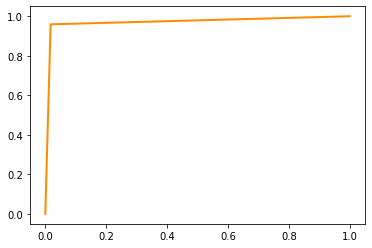

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(testY, pred)

roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
print("AUC ", roc_auc)